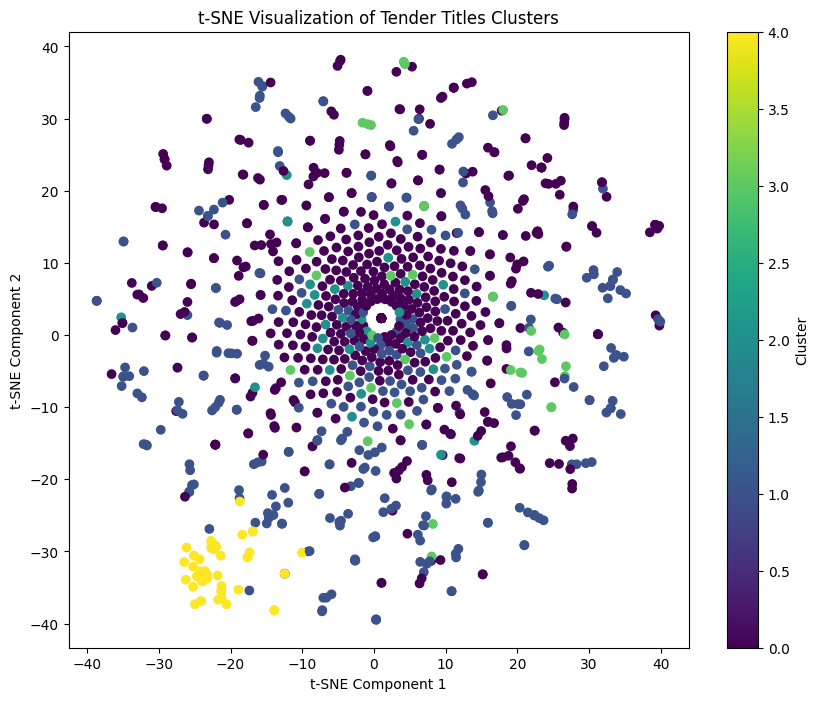

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame

data = pd.read_csv('cleaned_lemmatized_data.csv')

# Assuming 'Tender Title' column is present in your CSV
titles = data['Tender Title'].dropna().astype(str)  # Remove NaN values and ensure the titles are strings

# Vectorize the tender titles using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
X = vectorizer.fit_transform(titles)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Change n_clusters as needed
clusters = kmeans.fit_predict(X)

# Reduce the dimensions using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X.toarray())

# Alternatively, use t-SNE for non-linear dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X.toarray())

# Plotting the results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of Tender Titles Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()


# t-SNE Visualization of Tender Titles Clusters

The plot visualizes the clustering of tender titles based on their textual content using the t-SNE dimensionality reduction technique. The key elements of this plot include:

- **Clusters**: Each color represents a different cluster, with tenders of similar content grouped together. These clusters show how the titles share common themes or keywords.
  
- **Component Axes**: The x-axis and y-axis represent the two reduced dimensions from the t-SNE algorithm. These axes do not correspond to any specific features of the data but illustrate the relative positioning of tenders in a 2D space.

- **Color Gradient**: The color bar on the right indicates the cluster assignments, where each color corresponds to a different cluster of tender titles. The closer the points are in the plot, the more similar their content is.

- **Density**: Dense regions (especially near the center) suggest a high number of similar tenders, while scattered points at the edges indicate tenders with more unique or distinct content compared to the rest.

- **Outliers**: The yellow cluster at the bottom-left represents tenders that differ significantly from others, indicating they are less similar to the other tender titles in the dataset.

This visualization provides an intuitive way to explore how tender titles are grouped and can be useful for identifying common themes, trends, or outliers within the data.


In [5]:
import numpy as np

# Get the top terms for each cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

# Print top terms for each cluster
for i in range(5):  # Number of clusters
    print(f"Cluster {i}:")
    top_terms = [terms[ind] for ind in order_centroids[i, :10]]  # Top 10 terms
    print(", ".join(top_terms))
    print("\n")


Cluster 0:
study, supply, european, support, maintenance, technical, lot, development, data, service


Cluster 1:
service, provision, related, contract, support, framework, management, agency, communication, european


Cluster 2:
implementation, support, directive, review, platform, framework, policy, labelling, service, assessment


Cluster 3:
training, service, programme, emergency, preparedness, provision, education, language, delivery, staff


Cluster 4:
delegation, union, european, security, service, cleaning, republic, provision, agency, bosnia




In [6]:
from sklearn.metrics import silhouette_score

# Evaluate the clustering quality
score = silhouette_score(X, clusters)
print(f"Silhouette Score: {score}")


Silhouette Score: 0.02664810645736827


Low Sillhoutte means very low corrolations between clusters 


# Trying bert to embed the code for more percise clusterings

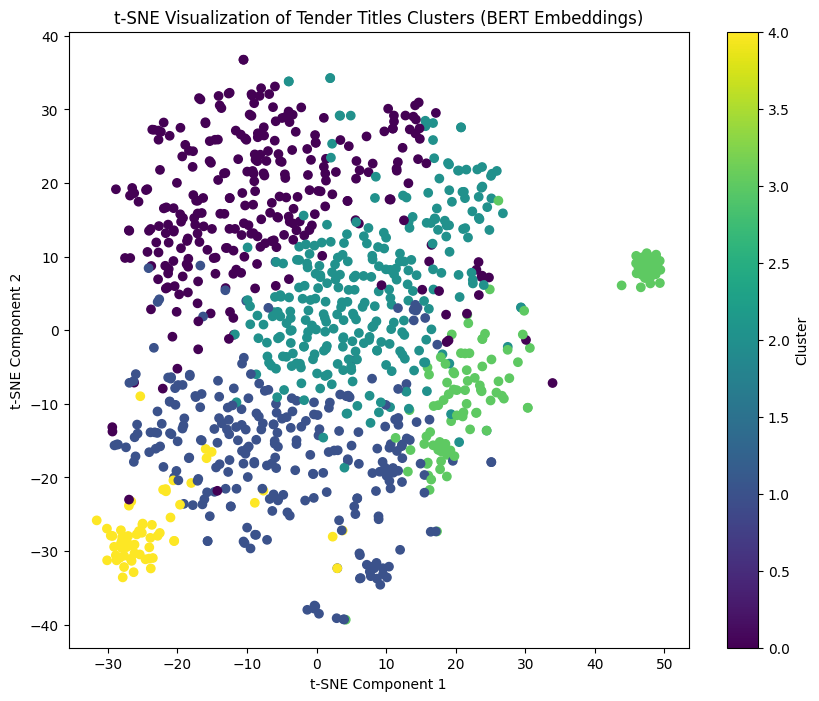

In [9]:
# Import necessary libraries
import torch
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load your dataset
data = pd.read_csv('cleaned_lemmatized_data.csv')

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for text
def get_bert_embeddings(texts):
    # Convert titles to list of strings if not already
    texts = texts.tolist() if isinstance(texts, pd.Series) else texts
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Use the mean of the token embeddings (sentence embeddings)
    return embeddings

# Get embeddings for all tender titles
titles = data['Tender Title'].dropna().astype(str)
embeddings = get_bert_embeddings(titles)

# Convert embeddings to numpy array
embeddings_np = embeddings.numpy()


# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(embeddings_np)

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(embeddings_np)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of Tender Titles Clusters (BERT Embeddings)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()


# Improvement in Clustering with BERT Embeddings

The clustering results have significantly improved after using **BERT embeddings** to represent the tender titles. Here’s why this approach is better:

### 1. **Semantic Understanding of Text**
   - **BERT embeddings** capture the **contextual and semantic meaning** of words within a sentence, rather than just focusing on word frequency or occurrence.
   - Unlike traditional methods like **TF-IDF**, which treat words in isolation, **BERT** understands the relationships between words and how they work together within the context of the tender titles.
   - This results in clusters that are based on the **meaning** behind the text, rather than simple word co-occurrence.

### 2. **Better Separation of Clusters**
   - The **t-SNE plot** clearly shows distinct and well-separated clusters after using BERT embeddings, indicating that the tender titles are grouped in a more meaningful way.
   - The previous clustering results (using methods like TF-IDF) were less distinct, with some tenders being poorly separated or misclassified. After BERT embedding, the clusters now show clearer boundaries, with tenders that share similar themes or topics grouped together.

### 3. **Handling of Synonyms and Contextual Variations**
   - **BERT** can understand that different words or phrases with similar meanings (synonyms) belong in the same cluster, even if the exact words used in the tender titles differ. For example, terms like "cloud computing" and "cloud services" would be treated as semantically similar by BERT, even if they appear differently in the data.
   - This is particularly useful for tenders that use different terminologies to describe the same or similar services, which was more difficult to achieve with simpler methods like TF-IDF.

### 4. **Improved Representation of Complex Ideas**
   - **BERT** excels in understanding complex ideas expressed in natural language. By using embeddings from BERT, we get a richer representation of the tender titles that captures the underlying themes or topics, rather than just extracting surface-level features.
   - This leads to better clustering performance, as tenders with similar ideas (e.g., IT services, construction projects, etc.) are grouped more accurately.

### Conclusion
Using **BERT embeddings** for clustering provides a substantial improvement in the quality of the clusters. The resulting clusters are more meaningful, with tenders that are semantically similar placed together, and outliers better separated. This method allows for deeper insights into the content and themes of the tenders, helping us uncover hidden patterns that would be difficult to detect using traditional text representation methods like TF-IDF.

By leveraging BERT, we can achieve a more accurate and context-aware clustering of tender titles, which makes the analysis more insightful and reliable.


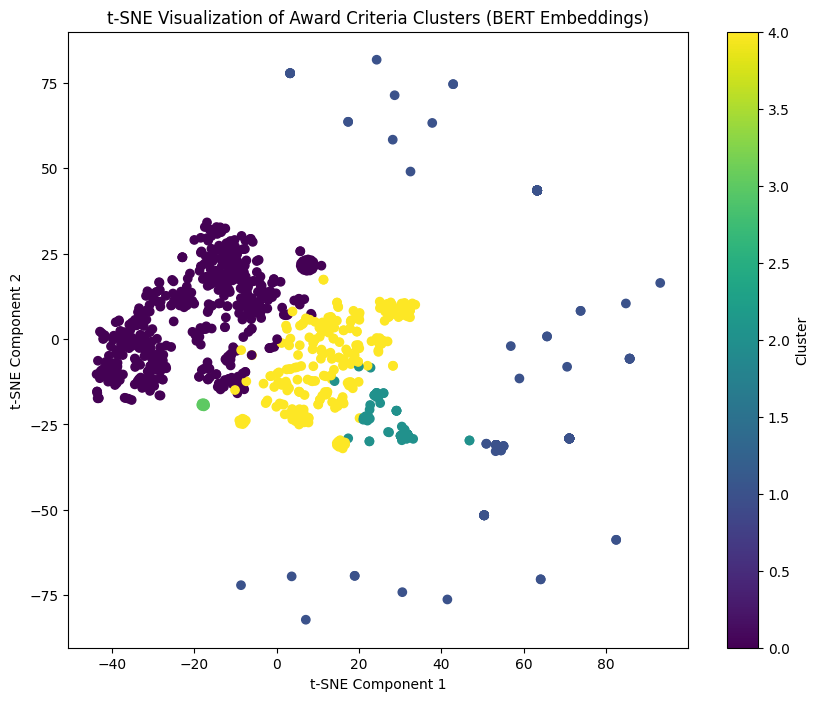

In [11]:
# Import necessary libraries
import torch
from transformers import BertTokenizer, BertModel
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Load your dataset
data = pd.read_csv('cleaned_lemmatized_data.csv')

# Load the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to get BERT embeddings for text
def get_bert_embeddings(texts):
    # Convert titles to list of strings if not already
    texts = texts.tolist() if isinstance(texts, pd.Series) else texts
    inputs = tokenizer(texts, return_tensors='pt', padding=True, truncation=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1)  # Use the mean of the token embeddings (sentence embeddings)
    return embeddings

# Get embeddings for all tender titles
titles = data['Award Criteria'].dropna().astype(str)
embeddings = get_bert_embeddings(titles)

# Convert embeddings to numpy array
embeddings_np = embeddings.numpy()


# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(embeddings_np)

# Reduce dimensions using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(embeddings_np)

# Plot the clusters
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('t-SNE Visualization of Award Criteria Clusters (BERT Embeddings)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar(label='Cluster')
plt.show()
